# Quick start

For convenience, let's begin by enabling [automatic reloading of modules](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) when they change.

In [1]:
%load_ext autoreload
%autoreload 2

## Import Qiskit Metal

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

%metal_heading Welcome to Qiskit Metal!

## My first Quantum Design (QDesign)

A Quantum Design (``QDesign``) can be selected from the design library `qiskit_metal.designs`. All designs are children of the `QDesign` base class, which defines the basic funcationality of a QDesign. 

We will start with the simple planar QDesign.

```python 
design = designs.DesignPlanar()
```

##### Interactivly view, edit, and simulate QDesign: Metal GUI

To launch the qiskit metal GUI,use the method `MetalGUI`.
```python 
gui = MetalGUI(design)
```


In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

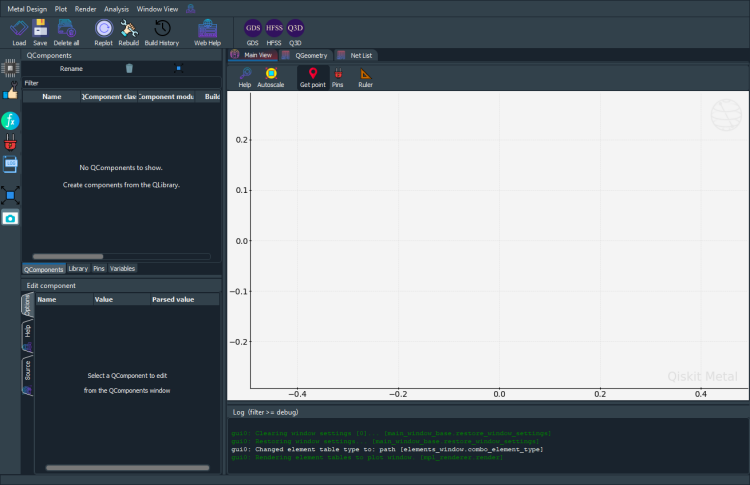

In [4]:
gui.screenshot()

In [5]:
%metal_heading Hello Quantum World!

## My First Quantum Component (QComponent)
### A transmon qubit
We can create a ready-made and optimized transmon qubit form the QLibrary of components.
Qubit qcomponents are stored in the library `qiskit_metal.qlibrary.qubits`. The file that contains the transmon pocket is called `transmon_pocket`,
and the `QComponent` class inside it is `TransmonPocket`.

* Let's create a new qubit by creating an object of this class. 

In [6]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Create a new qcomponent object with name 'Q1' 
q1 = TransmonPocket(design, 'Q1')
gui.rebuild()  # rebuild the design and plot 

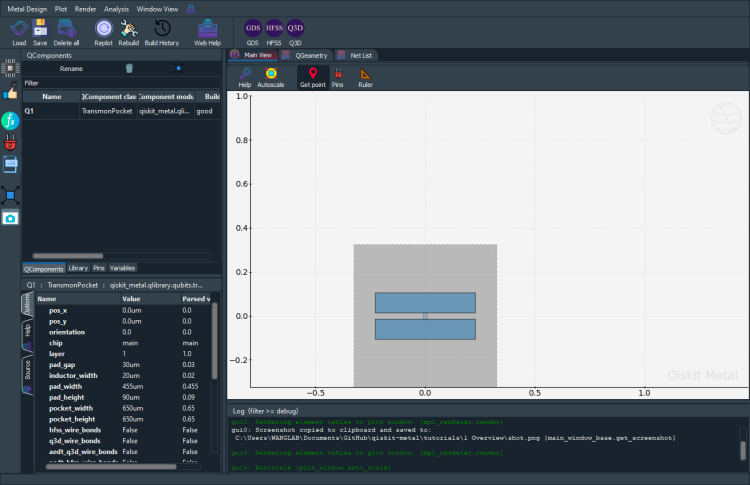

In [7]:
# save screenshot
gui.edit_component('Q1')
gui.autoscale()
gui.screenshot()

Let's see what the Q1 object looks like

In [8]:
q1

name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '0.0um',                      
  'pos_y'             : '0.0um',                      
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '20um',                       
  'pad_width'         : '455um',                      
  'pad_height'        : '90um',                       
  'pocket_width'      : '650um',                      
  'pocket_height'     : '650um',                      
  'hfss_wire_bonds'   : False,                        
  'q3d_wire_bonds'    : False,                        
  'aedt_q3d_wire_bonds': False,                        
  'aedt_hfss_wire_bonds': False,                        
  'hfss_inductance'   : '10nH',                       
  'hfss_ca

Parsed view of options

#### What are the default options?
The QComponent comes with some default options. The options are used in the `make` function of the qcomponent to create the QGeometry you see in the plot above. 
* Options are parsed by Qiskit Metal. 
* You can change them from the gui or the script api. 

In [9]:
%metal_print How do I edit options?  API or GUI

You can use the gui to create, edit, plot, modify, quantum components.
Equivalently, you can also do everything form the python API. 
The GUI is just calling the API for you.

In [10]:
# Change options
q1.options.pos_x = '0.5 mm'
q1.options.pos_y = '0.25 mm'
q1.options.pad_height = '225 um'
q1.options.pad_width  = '250 um'
q1.options.pad_gap    = '50 um'

# Update the geoemtry, since we changed the options
gui.rebuild()

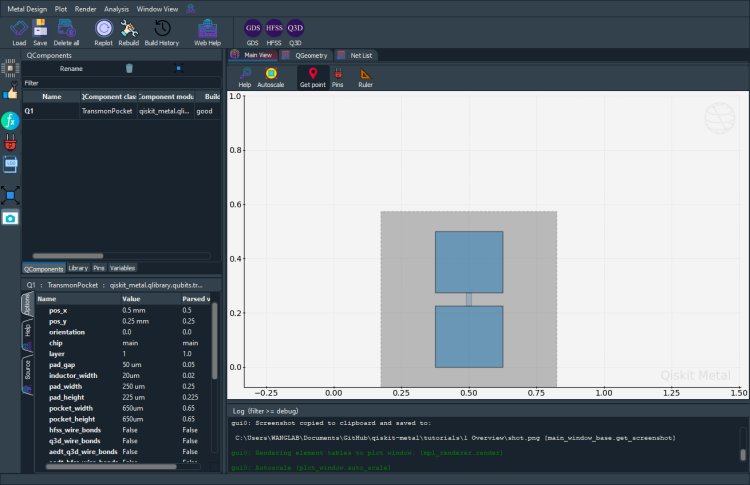

In [11]:
gui.autoscale()
gui.screenshot()

### Where are the QComponents stored?
They are stored in `design.components`. It can be accessd as a dictionary (`design.components['Q1']`) or object (`design.components.Q1`).

In [12]:
q1 = design.components['Q1']

In [13]:
%metal_print Where are the default options? 

A QComponent is created with default options.
To find out what these are use `QComponentClass.get_template_options(design)`

In [14]:
TransmonPocket.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'},
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'aedt_q3d_wire_bonds': False,
 'aedt_hfss_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction',
 'aedt_q3d_inductance': 1e-08,
 'aedt_q3d_capacitance': 0,
 'aedt_hf

In [15]:
%metal_print How do I change the default options? 

Now lets change the default options we will use to create the transmon

In [ ]:
# THIS ISN'T CHANGING THE DEFAULT OPTIONS - NEEDS UPDATE
q1.options.pos_x = '0.5 mm'
q1.options.pos_y = '250 um'

# Rebubild for changes to propagate
gui.rebuild()

In [ ]:
%metal_print How do I work with units? <br><br> (parse options and values) 

#### Parsing strings into floats

Use the `design.parse_value` or `QComponent.parse_value` (such as `q1.parse_value`). The two functions serve the same purpose. 

In [ ]:
print('Design default units for length: ', design.get_units())
print('\nExample 250 micron parsed to design units:', design.parse_value('0.250 um'),  design.get_units())

dictionary = {'key_in_cm': '1.2 cm', 'key_in_microns': '50 um'}
print('\nExample parse dict:', design.parse_value(dictionary))

a_list = ['1m', '1mm', '1um', '1 nm']
print('\nExample parse list:', design.parse_value(a_list))

#### Some basic arithmetic and parsing

In [ ]:
design.parse_value('2 * 2um')

In [ ]:
design.parse_value('2um + 5um')

In [ ]:
design.qgeometry.tables['junction']

### Advanced: parse into arrays, list, etc.  
Can use python syntax inside options. Parse uses pythonic `ast_eval`.

In [ ]:
#### List 
print('* '*10+' LIST '+'* '*10,'\n')
str_in = "[1,2,3,'10um']"
out = design.parse_value(str_in)
print(f'Parsed output:\n {str_in}  ->  {out} \n Out type: {type(out)}\n')

str_in = "['2*2um', '2um + 5um']"
out = design.parse_value(str_in)
print(f'Parsed output:\n {str_in}  ->  {out} \n Out type: {type(out)}\n')

#### Dict
print('* '*10+' DICT '+'* '*10,'\n')

str_in = "{'key1': '100um', 'key2': '1m'}"
out = design.parse_value(str_in)
print(f'Parsed output:\n {str_in}  ->  {out} \n Out type: {type(out)}\n')

## How do I overwrite QComponents? 

To enable component overwrite of components with the same name, use the following cell 

In [ ]:
design.overwrite_enabled = True

In [ ]:
%metal_heading Quantum pins: QPins!

### QPins: The dynamic way to connect qcomponents 

The component designer can define pins. Pins can be used to link components together. For examaple, two transmon can each have a pin. The two pins can be connectoed by CPWs, as we will show below. 

First, let us add pins to the transmon. 
We will add 4 pins called `a`, `b`, `c`, and `d`. 
Each pin will be at a differnet location (corner of the transmon), defined by the options `loc_W` and `loc_H`.

In [ ]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

design.delete_all_components()

options = dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(  # pin connecotrs
        a = dict(loc_W=+1,loc_H=+1), 
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

q1 = TransmonPocket(design, 'Q1', options = dict(pos_x='+0.5mm', pos_y='+0.5mm', **options))

In [ ]:
# Take a screenshot with the component highlighted and the pins shown
gui.rebuild()
gui.autoscale()
gui.edit_component('Q1')
gui.zoom_on_components(['Q1'])
gui.highlight_components(['Q1'])
gui.screenshot()

To access a pin

In [ ]:
q1.pins.a
q1.pins['a']

### How do I edit the component source code and see changes immidietly? 
If you have selected a QComponent, you can call the button that says edit source in the gui. 
Once selected, you could also call the same function from the code.

In [ ]:
gui.edit_component('Q1')


This will pop open a new source editor window, you can change the source on the fly. 
* Make sure you press the `Rebuild component` button in the source editor when you are ready to save and make your changes.

In [ ]:
%metal_heading My first quantum chip

## Creating a whole chip of qubit with connectors 

Let's now create a a whole chip. In the following, you will pass options to create 4 transmons qubits in a ring.
First let us clear all qcomponents in the design. 

In [ ]:
design.delete_all_components() 
gui.rebuild() # refresh

In [ ]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

## Custom options for all the transmons
options = dict(
    # Some options we want to modify from the deafults
    # (see below for defaults)
    pad_width = '425 um', 
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict( 
        a = dict(loc_W=+1,loc_H=+1), 
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

## Create 4 transmons

q1 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.55mm', pos_y='+0.0mm', **options))
q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x='+0.0mm', pos_y='-0.9mm', orientation = '90', **options))
q3 = TransmonPocket(design, 'Q3', options = dict(
    pos_x='-2.55mm', pos_y='+0.0mm', **options))
q4 = TransmonPocket(design, 'Q4', options = dict(
    pos_x='+0.0mm', pos_y='+0.9mm', orientation = '90', **options))

## Rebuild the design
gui.rebuild()
gui.autoscale()

In [ ]:
gui.toggle_docks(True)
gui.screenshot()

In [ ]:
%metal_heading Connecting QPins with coplanar waveguides (CPWs)

Let's import the basic cpw QComponent from the QLibrary. It is a class called `RouteMeander`.
We can see its default options using `RouteMeander.get_template_options(design)`

In [ ]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
RouteMeander.get_template_options(design)

We can now modify the options and connect all four qubits. Since this is repetative, you can define a function to wrap up the repetatvie steps. Here we will call this `connect`. This function creates a `RouteMeander` QComponent class.

In [ ]:
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)


def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight='0.13mm'
        ),
        total_length=length,
    fillet = '90um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)


asym = 150
cpw1 = connect('cpw1', 'Q1', 'd', 'Q2', 'c', '6.0 mm', f'+{asym}um')
cpw2 = connect('cpw2', 'Q3', 'c', 'Q2', 'a', '6.1 mm', f'-{asym}um', flip=True)
cpw3 = connect('cpw3', 'Q3', 'a', 'Q4', 'b', '6.0 mm', f'+{asym}um')
cpw4 = connect('cpw4', 'Q1', 'b', 'Q4', 'd', '6.1 mm', f'-{asym}um', flip=True)

gui.rebuild()
gui.autoscale()

In [ ]:
gui.toggle_docks(True)
gui.highlight_components(['Q1','Q2','Q3','Q4','cpw1','cpw2','cpw3','cpw4'])
gui.screenshot()

In [ ]:
design.components.keys()

We can access the created CPW from the design too.

In [ ]:
design.components.cpw2

We can see all the pins

In [ ]:
%metal_heading Variables in options

## Variables 

The design can have variables, which can be used in the component options.

In [ ]:
design.variables.cpw_width = '10um'
design.variables.cpw_gap = '6um'
gui.rebuild()

For example, we can all qubit pads using the variables.  

In [ ]:
cpw1.options.lead.end_straight = '100um'
cpw2.options.lead.end_straight = '100um'
cpw3.options.lead.end_straight = '100um'
cpw4.options.lead.end_straight = '100um'

In [ ]:
# Set variables in the design
design.variables.pad_width = '450 um'
design.variables.cpw_width = '25 um'
design.variables.cpw_gap = '12 um'

# Assign variables to component options
q1.options.pad_width = 'pad_width'
q2.options.pad_width = 'pad_width'
q3.options.pad_width = 'pad_width'
q4.options.pad_width = 'pad_width'

# Rebuild all compoinent and refresh the gui 
gui.rebuild()
gui.autoscale()

In [ ]:
gui.screenshot()

In [ ]:
%metal_heading Render to GDS

In [ ]:
gds = design.renderers.gds
gds.options.path_filename

In [ ]:
gds.options.path_filename = '../resources/Fake_Junctions.GDS'

In [ ]:
q1.options

## gds.options.path_filename

Need to give the correct path and filename that has gds formatted cells.
An example is located in the repositary under resources directory.
The cells are "junctions" that would be placed inside qubits.  Fake_Junctions has 
three cells named: "Fake_Junction_01", "Fake_Junction_02", "my_other_junction".  

Example:  When creating transmon the default_option for gds_cell_name is "my_other_junction".

In [ ]:
gds.options.path_filename = "../resources/Fake_Junctions.GDS"

In [ ]:
design.renderers.gds.export_to_gds("awesome_design.gds")

In [ ]:
%metal_heading More QComponents

Basic and crazy shapes. 

See their source code to see how to get started on a few simple examples.

In [ ]:
from qiskit_metal.qlibrary.sample_shapes.n_square_spiral import NSquareSpiral
# print(NSquareSpiral.get_template_options(design))
ops = {
    'n': '10',
    'width': '10um',
    'radius': '100um',
    'gap': '22um',
    'pos_x': '0.65mm',
    'pos_y': '2.2mm',
    'orientation': '0',
    'subtract': 'False'}
NSquareSpiral(design, 'spiral', ops)
NSquareSpiral(design, 'spiral_cut', {**ops, **dict(subtract=True, width='22um', gap='10um')})
gui.rebuild()

To see source, try ``??NSquareSpiral``. Go to the actual source file and edit it, copy it, or edit it in the GUI using the `Edit Source` button.

In [ ]:
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
# CpwStraightLine.get_template_options(design)
myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component='Q4',
                pin='c'),
            end_pin=Dict(
                component='spiral',
                pin='spiralPin'))
        )


RouteStraight(design, 'cpw_s1', myoptions);
gui.rebuild()

In [ ]:
qcomponents = ['spiral', 'cpw_s1']
gui.highlight_components(qcomponents)
gui.zoom_on_components(qcomponents)
gui.screenshot()

####  NGon

In [ ]:
from qiskit_metal.qlibrary.sample_shapes.n_gon import NGon
# display(NGon.get_template_options(design))
ops = {
    'n': '5',
    'radius': '250um',
    'pos_x': '-0.85mm',
    'pos_y': '2.0mm',
    'orientation': '15',
    'subtract': 'False',
    'helper': 'False',
    'chip': 'main',
    'layer': '1'}
NGon(design, 'ngon', ops)
NGon(design, 'ngon_negative', {**ops, **dict(subtract=True, radius='350um')})
gui.rebuild()

In [ ]:
gui.zoom_on_components(['ngon_negative'])
gui.screenshot()

In [ ]:
from qiskit_metal.qlibrary.sample_shapes.circle_raster import CircleRaster
display(CircleRaster.get_template_options(design))

ops = { 'radius': '300um',
        'pos_x': '-1.5mm',
        'pos_y': '2mm',
        'resolution': '16',
        'cap_style': 'round',
        'subtract': 'False',
        'helper': 'False',
        'chip': 'main',
        'layer': '1'}
CircleRaster(design, 'CircleRaster', ops)
gui.rebuild()

In [ ]:
gui.zoom_on_components(['CircleRaster'])
gui.screenshot()

In [ ]:
from qiskit_metal.qlibrary.sample_shapes.rectangle_hollow import RectangleHollow
display(RectangleHollow.get_template_options(design))

ops = { 'width': '500um',
        'height': '300um',
        'pos_x': '-2.3mm',
        'pos_y': '2mm',
        'orientation': '0',
        'subtract': 'False',
        'helper': 'False',
        'chip': 'main',
        'layer': '1',
        'inner': {  'width': '250um',
                    'height': '100um',
                    'offset_x': '40um',
                    'offset_y': '-20um',
                    'orientation': '15'}}
RectangleHollow(design, 'RectangleHollow', ops)
gui.rebuild()

In [ ]:
gui.zoom_on_components(['RectangleHollow'])
gui.screenshot()

In [ ]:
gui.autoscale()
gui.screenshot()

In [ ]:
%metal_heading The geometry of QComponent: QGeometry

### Geometric boundary of a qcomponent?
Return the boundry box of the geometry, for example: `q1.qgeometry_bounds()`.  
The function returns a tuple containing (minx, miny, maxx, maxy) bound values
for the bounds of the component as a whole.

In [ ]:
for name, qcomponent in design.components.items():
    print(f"{name:10s} : {qcomponent.qgeometry_bounds()}")

### What is QGeometry? 

We can get all the QGeometry of a QComponent. There are several kinds, such as `path` and `poly`. Let us look at all the polygons used to create qubit `q1`

In [ ]:
q1.qgeometry_table('poly')

Paths are lines. These can have a width.

In [ ]:
q1.qgeometry_table('path')

Junction table holds information about Quantum juctions. Placement is defined by LineString and width. 

In [ ]:
q1.qgeometry_table('junction')

In [ ]:
%metal_heading Qiskit Metal Version

In [ ]:
metal.about();

Can close Metal GUI from both notebook and GUI.

In [ ]:
# gui.main_window.close()